In [1]:
from aixi_booster import *
import numpy as np

In [2]:
#X = np.array(np.arange(1000),ndmin=2).T
#Y = np.array(np.sin(X/12.),ndmin=2)

In [3]:
#делаем датасет
#Суть датасета: есть зашумлённая синусоида, на которую наложены случайные блуждания. 
#AIXI примерно знает текущее состояние блужданий и немного устаревшие значения этой "синусоиды"
j = 0
X_lst = []
Y_lst = []
X_rec = [0, 0]
k = 0
dk = -0.015
for i in range(1000):
    j += (np.random.rand()-0.5)*6
    dk += (np.random.rand()-0.48)*0.001
    k += dk
    Y_rec = [np.sin(X_rec[0]*0.07 + X_rec[1]*0.07) + k]
    Y_prev = 0
    if len(Y_lst)>5:
        Y_prev = Y_lst[-5][0]
    X_rec = [i, j, dk, Y_prev]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst)

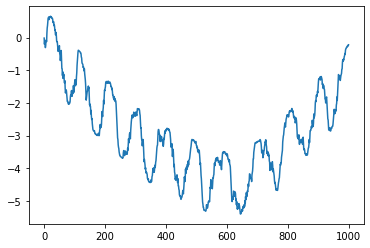

In [4]:
plt.plot(Y)

In [5]:
border = 500
X_train = X[:border,:]
X_test = X[border:,:]
Y_train = Y[:border,:]
Y_test = Y[border:,:]

In [6]:
%%time
#forest_count - число гипотез, то есть размер леса гипотез
#episodes - эпизоды работы AIXI. Если в реальной жизни данные - это несколько блоков по несколько записей.
#Причём каждый блок - это последовательность, у которой известно прошлое, но неизвестно будущее и неизвестны другие последовательности.
#Вот эпизоды - это такие последовательности. Например, если у нас данные - это 2 поездки на машине в 10 минут и в 50 минут, то первым эпизодом будут данные из одной поездки, а вторым - из второй.
#sample_part - сколько последовательностей использовать для генерации каждой одной гипотезы
#popsize, maxiter, alpha_count, elitarism, mutation_p - параметры эволюции (мы не будет тупо перебирать гипотезы)
#popsize - размер популяции, maxiter - число поколений, alpha_count - число альфачей (кто размножается), elitarism - число элитариев (кто сохраняется в неизменном виде в следующем поколении) 
#mutation_p - вероятность мутации
#boosting_count - каждая гипотеза сделана по схеме "бустинг". То есть вначале подбираем гипотезу, 
#которая максимально хорошо предсказывает Y, затем гипотезу, которая максимально хорошо исправляет ошибки первой гипотезы и так далее
#boosting_count - это число слоёв в этом "бутерброде"
model = symbolic_regression_multyboosting(size_genom=900,tact_count=30, regularization=0.06)
episodes=[[0,int(len(Y_train)/3)],[int(len(Y_train)/3),int(2*len(Y_train)/3)],[int(2*len(Y_train)/3),int(len(Y_train))]]
model.fit(X_train,Y_train,forest_count=5,sample_part=0.6,episodes=episodes,popsize=32, maxiter=5, boosting_count=2, alpha_count=6, elitarism=2, mutation_p=0.02)

FOREST NUMBER 0, episodes [[  0 166]
 [166 333]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005882352941260504 0.01849259214883407 0.013658536585414634 0.03517583248661159
[0.66666667 0.01894238 0.01238095 0.00884956 0.0111465  0.02874618
 0.01493599 0.01420765 0.01680672 0.01259259 0.0104712  0.01935964
 0.01015228 0.01590106 0.01455026 0.01573255 0.00909682 0.01268657
 0.01605351 0.01466544 0.01083032 0.0286783  0.01671309 0.01308615
 0.01403509 0.01252408 0.01278195 0.0173913  0.01403509 0.00890688
 0.00884956 0.01190476 0.00713436 0.02118644 0.01321586 0.01120448
 0.01321586 0.01341463 0.01444867 0.01258851 0.01902174 0.01318852
 0.01098039 0.01268743 0.02048518 0.01104972 0.01599327 0.00588235
 0.008      0.02463433 0.01530612 0.0179051  0.00990099 0.01666667
 0.01574803 0.025      0.01395349 0.01365854 0.01365854 0.01365854
 0.01365854 0.01365854 0.01337154 0.01365854 0.01365188 0.0136652
 0.01364522 0.01396917 0.01367188 0.01327014 0.01413255 0.01383588
 0.01383399 0.013

selected linear model 0.05, mse 0.04677155843272536 [0.060293171595687076, 0.19175599395335508, 0.5772723195756736, 1.311341396023268, 0.05801423107272009, 0.04677155843272536]
BOOST 0 ready. Score 0.10412134682823357.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005872483221560402 0.01847889183574037 0.013651877133154558 0.035149732097899566
[0.66666667 0.01894238 0.01238095 0.00884956 0.01111111 0.02874618
 0.01493599 0.01417666 0.01680672 0.01259259 0.01044386 0.01934524
 0.01015228 0.01587302 0.01455026 0.01538462 0.00908501 0.01268657
 0.01605351 0.01466544 0.01081731 0.02860697 0.01668211 0.01302932
 0.01403509 0.01252408 0.01274363 0.0173913  0.01403509 0.00890688
 0.00884956 0.01188707 0.00713436 0.02118644 0.01321586 0.01120448
 0.01319261 0.01339829 0.01443769 0.01236476 0.01898734 0.01315789
 0.01098039 0.01268743 0.02048518 0.01104972 0.01599327 0.00587248
 0.008      0.02463433 0.01530612 0.0178731  0.00988875 0.01665125
 0.01574803 0.025      0.01386322 0.0136518

selected boosting without linear layer, mse 6.124241005701899 [30822.66321553359, 6.124241005701899, 16.96103531767463, 25.23702441834364, 13.682558407823532, 13.41071972717156]
BOOST 1 ready. Score:0.2762236313481497
err_sum,complexity 0.0690765039699608 121
FOREST NUMBER 1, episodes [[  0 166]
 [166 333]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005872483221560402 0.018115942029347826 0.013651877133154558 0.03441295546578947
[0.66666667 0.01894238 0.01238095 0.00884173 0.01111111 0.02838164
 0.01493599 0.01417666 0.01666667 0.01259259 0.01044386 0.01934524
 0.0101437  0.01671064 0.0151715  0.01538462 0.00908501 0.01248164
 0.01603206 0.01399825 0.01081731 0.02853598 0.01628959 0.01302932
 0.01403509 0.01248799 0.01348315 0.0173913  0.01403509 0.00889248
 0.00884956 0.01188707 0.00708383 0.01924557 0.01260504 0.01120448
 0.01316945 0.01339829 0.01443769 0.01307692 0.01897019 0.01315789
 0.01097179 0.01268743 0.02048518 0.01104972 0.01599327 0.00587248
 0.00797607 0.02463433 

selected boosting with linear layer, mse 0.06227156369251779 [0.06227156369251779, 0.19175599395335508, 0.7101891712464246, 1.4278085906180005, 0.21333825600054332, 0.1948160290979867]
BOOST 0 ready. Score 0.10852893763354364.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005872483221560402 0.018108053570102065 0.013645224171588694 0.0341097239004859
[0.66666667 0.01894238 0.01238095 0.00883392 0.0111023  0.02834741
 0.01489362 0.01385928 0.01665405 0.01257396 0.01044386 0.01934524
 0.0101437  0.01671064 0.0151715  0.01535509 0.00908501 0.01247249
 0.016      0.01399825 0.01079137 0.02850062 0.01627486 0.01302932
 0.01403509 0.01248799 0.01344287 0.01737452 0.01403509 0.0088853
 0.00884956 0.01188707 0.00706714 0.01920123 0.01259182 0.01120448
 0.01316945 0.01339829 0.01443769 0.01307692 0.01897019 0.01315789
 0.01097179 0.01267281 0.02048518 0.01104972 0.01595298 0.00587248
 0.00797607 0.02461538 0.01530612 0.0178731  0.00982801 0.01665125
 0.01574803 0.025      0.01383764 0.0

selected boosting with linear layer, mse 1.638697298099846 [1.638697298099846, 2.4615136913229043, 2.0611126639694843, 3.4182718917625565, 1.890672833098144, 1.8839272721700329]
BOOST 1 ready. Score:0.537182875386967
err_sum,complexity 0.08663097504249423 100
FOREST NUMBER 2, episodes [[  0 166]
 [333 500]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005872483221560402 0.01789197915116332 0.013627190695764804 0.03393900064899991
[0.66666667 0.01830664 0.01235741 0.00883392 0.0110935  0.02833032
 0.01489362 0.01354167 0.01661631 0.01257396 0.01044386 0.01934524
 0.01013514 0.01671064 0.01493506 0.0152381  0.00905563 0.01246334
 0.016      0.01399825 0.01075269 0.02850062 0.01626016 0.01295896
 0.01400233 0.01248799 0.01339286 0.01737452 0.01403509 0.00887097
 0.00884956 0.01186064 0.00706714 0.01918649 0.01259182 0.0111836
 0.01264755 0.01339829 0.01443769 0.01306687 0.01827676 0.01315789
 0.01095462 0.01267281 0.02046311 0.01104972 0.01595298 0.00587248
 0.00797607 0.02459646 0.

selected linear model 50, mse 0.1366517549902182 [0.5277570167805694, 0.3098153912746976, 0.1366517549902182, 0.5699562424162948, 0.874188696689513, 3.7375129436122916]
BOOST 0 ready. Score 0.0939483435574285.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005867560771248952 0.0178735105408341 0.013605442176919339 0.03392130257808684
[0.66666667 0.01829268 0.01235741 0.00881834 0.01090343 0.02833032
 0.01489362 0.01351351 0.01660377 0.01256467 0.01044386 0.01899196
 0.01013514 0.01669596 0.01492537 0.0152381  0.00905563 0.01225667
 0.01595745 0.01373391 0.01075269 0.02846535 0.01708633 0.01290323
 0.01384083 0.01248799 0.01334322 0.01737452 0.01403509 0.00887097
 0.00883978 0.01186064 0.00705882 0.01912777 0.01202405 0.0111836
 0.01262626 0.013382   0.01442673 0.01304682 0.01826087 0.01315789
 0.0109375  0.01267281 0.02046311 0.01104972 0.01595298 0.00586756
 0.00890208 0.02455871 0.01529497 0.0178731  0.00982801 0.01665125
 0.01573034 0.0249777  0.01383764 0.01363194 0.01363194

selected linear model 50, mse 1.8884052407416279 [9.170564973540106, 5.601421226858845, 1.8884052407416279, 8.56852482126014, 39.2368174028935, 44.10147903224861]
BOOST 1 ready. Score:0.5291227110211798
err_sum,complexity 0.1556814431694807 91
FOREST NUMBER 3, episodes [[166 333]
 [166 333]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005862646566247906 0.01787330576197201 0.013546211746517368 0.032950217342179317
[0.66666667 0.01829268 0.01211556 0.00881834 0.01089494 0.02833032
 0.01442308 0.01351351 0.01607012 0.01252763 0.01044386 0.01899196
 0.01011804 0.0166813  0.01433915 0.0152236  0.00892288 0.01225667
 0.0155139  0.01369863 0.01075269 0.02846535 0.01708633 0.01290323
 0.0137931  0.01248799 0.01333333 0.01732435 0.01398601 0.00886382
 0.00883978 0.01185185 0.00700935 0.01912777 0.01201201 0.0111836
 0.01259446 0.01298701 0.01442673 0.01302682 0.018245   0.01315789
 0.01090343 0.01265823 0.0204521  0.01104972 0.01592624 0.00586265
 0.00890208 0.02455871 0.01485149 0.0178

selected linear model 50, mse 0.018723320577868005 [0.046846842400986306, 0.07255035195714739, 0.018723320577868005, 0.0486743648789858, 0.019829267203056476, 0.020388061634819626]
BOOST 0 ready. Score 0.0726524263386366.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005742411813043478 0.01786532295011452 0.013533110943037545 0.03282753455911963
[0.66666667 0.01829268 0.01162791 0.00881834 0.01089494 0.02833032
 0.01442308 0.01351351 0.01622003 0.0125092  0.01044386 0.01899196
 0.01011804 0.0166813  0.0143213  0.01520913 0.00892288 0.01225667
 0.0155139  0.01369863 0.01075269 0.02846535 0.01704036 0.01290323
 0.01310044 0.01248799 0.01332346 0.01651376 0.01398601 0.00856698
 0.00883978 0.01185185 0.00700117 0.01909855 0.01201201 0.0111836
 0.01259446 0.0122631  0.01442673 0.01298701 0.01815039 0.01315789
 0.01090343 0.01260023 0.0204521  0.01104972 0.01592624 0.00574241
 0.00872093 0.02452107 0.01463415 0.0178731  0.00953516 0.01633394
 0.01569507 0.02488889 0.01383764 0.013612

selected linear model 1000, mse 1.6887000758978676 [2.97649910439059, 4.997146841806047, 2.005635286389235, 1.6887000758978676, 2.4830150981650436, 2.506992710010341]
BOOST 1 ready. Score:0.10526172621088961
err_sum,complexity 0.14821066931639718 77
FOREST NUMBER 4, episodes [[  0 166]
 [  0 166]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005640612409427881 0.01777777777785185 0.013480982185893114 0.03244274809179389
[0.66666667 0.01827875 0.01160714 0.00881834 0.01089494 0.02833032
 0.01440329 0.01351351 0.01622003 0.01249082 0.01037613 0.0189781
 0.01010101 0.01665206 0.0143213  0.01515152 0.0089172  0.01223902
 0.01609788 0.01367521 0.01073986 0.02839506 0.01700985 0.01284797
 0.01310044 0.01248799 0.01332346 0.01648352 0.01398601 0.00856698
 0.00861141 0.01184308 0.00698487 0.01909855 0.012      0.01116279
 0.01257334 0.0122631  0.01437216 0.01298701 0.01813472 0.01311728
 0.01089494 0.01260023 0.0204521  0.01104972 0.01592624 0.00564061
 0.00871249 0.0245023  0.01462396 0

selected linear model 1, mse 0.0670603767966105 [0.11747709849411012, 0.3101306283169569, 0.12335208601120723, 0.20935954695529851, 0.0670603767966105, 0.07094100656093776]
BOOST 0 ready. Score 0.10625337745049834.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005613472333680834 0.017708909795248636 0.013432478585317952 0.032359630419551526
[0.66666667 0.01891074 0.01160714 0.00881057 0.01087801 0.02831325
 0.01440329 0.01351351 0.01622003 0.01248164 0.01037613 0.0189781
 0.01010101 0.01665206 0.0143213  0.01512287 0.00890585 0.01222142
 0.01609788 0.01367521 0.01072706 0.02839506 0.01697945 0.01282051
 0.01310044 0.01248799 0.01331361 0.01648352 0.01336303 0.00856031
 0.00861141 0.01183432 0.00698487 0.01909855 0.012      0.01116279
 0.01257334 0.01224944 0.01432881 0.01298701 0.01813472 0.01311728
 0.01087801 0.01257143 0.02040816 0.01104101 0.0159129  0.00561347
 0.00871249 0.02448355 0.01462396 0.0178731  0.00953516 0.01630435
 0.01557286 0.02486679 0.01381215 0.01342926 0.

selected boosting with linear layer, mse 1.4479114713586603 [1.4479114713586603, 2.352040200122456, 1.9365352389482258, 1.7275143798133026, 2.2462537128613795, 2.271144126738773]
BOOST 1 ready. Score:0.08641935202311679
err_sum,complexity 0.7603905759441617 94
CPU times: user 1min 37s, sys: 20.3 s, total: 1min 57s
Wall time: 14min 46s


In [7]:
Y_pred = model.predict(X_test,return_hist=True)
#ПРОТОКОЛ ГИСТОГРАММЫ: [pred_list,p_array,m_pred]  
#pred list - это прогноз ы отдельных моделей
#p_array - это вероятности этих моделей быть истинными (очень условно, но это терминология AIXI. Вероятность зависит от mse и числа ненулевых генов)
#m_pred - матожидание результата. Взвешенная сумма всех прогнозов

6.071591476499876e-05
0.9999341688074522


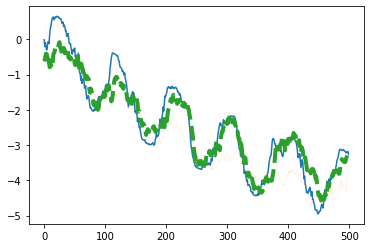

In [8]:
#train
#отрисовать факт синим
Y_pred = model.predict(X_train,return_hist=True)
plt.plot(Y_train)
[pred,p_array,m_pred] = Y_pred
   
for i in range(len(pred)):
    #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
    if 10+np.log(p_array[i])>0:
        print(p_array[i])
        plt.plot(pred[i],'--',linewidth=0.4*np.max([10+np.log(p_array[i]),0] ) )

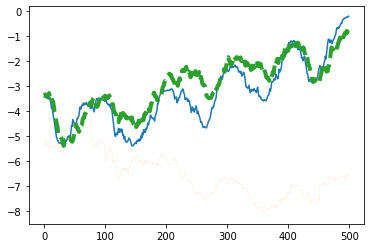

In [9]:
#test
#отрисовать факт
Y_pred = model.predict(X_test,return_hist=True)
plt.plot(Y_test)
[pred,p_array,m_pred] = Y_pred
   
for i in range(len(pred)):
    #отрисовать прогноз - несколькими цветами, яркость пропорциональна вероятности
    if 10+np.log(p_array[i])>0:
        plt.plot(pred[i],'--',linewidth=0.4*np.max([10+np.log(p_array[i]),0] ) )

In [10]:
mae = np.mean(np.abs(m_pred - Y_test))
mae_mean = mae/np.mean(np.abs(Y_test))
mae, mae_mean

(0.5394899503441315, 0.1624767615437048)

In [11]:
#делаем датасет
#Суть датасета: есть рандомные массивы, надо найти максимум
X_lst = []
Y_lst = []
for i in range(1000):
    X_rec = np.random.rand(6)*20
    Y_rec = [np.max(X_rec)]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst,ndmin=2)

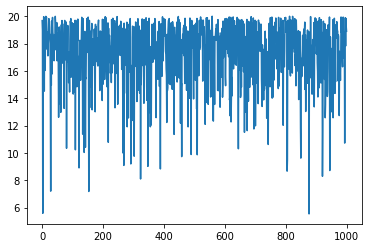

In [12]:
plt.plot(Y)

In [13]:
border = 500
X_train = X[:border,:]
X_test = X[border:,:]
Y_train = Y[:border,:]
Y_test = Y[border:,:]

In [14]:
%%time
model = symbolic_regression_multyboosting(size_genom=900,tact_count=50, regularization=0.06)
episodes=[]
for i in range(len(Y_train)-1):
    episodes.append([i,i+1])
model.fit(X_train,Y_train,forest_count=4,sample_part=0.6,episodes=episodes,popsize=32, maxiter=5, boosting_count=2, alpha_count=6, elitarism=2, mutation_p=0.02)

FOREST NUMBER 0, episodes [[168 169]
 [ 15  16]
 [493 494]
 [ 72  73]
 [ 22  23]
 [299 300]
 [466 467]
 [ 75  76]
 [360 361]
 [263 264]
 [162 163]
 [433 434]
 [ 95  96]
 [ 75  76]
 [213 214]
 [ 47  48]
 [319 320]
 [287 288]
 [218 219]
 [404 405]
 [124 125]
 [116 117]
 [293 294]
 [167 168]
 [195 196]
 [102 103]
 [260 261]
 [426 427]
 [363 364]
 [ 51  52]
 [359 360]
 [ 38  39]
 [490 491]
 [ 33  34]
 [ 58  59]
 [380 381]
 [255 256]
 [323 324]
 [325 326]
 [ 88  89]
 [196 197]
 [302 303]
 [454 455]
 [351 352]
 [211 212]
 [121 122]
 [ 31  32]
 [450 451]
 [ 80  81]
 [ 52  53]
 [238 239]
 [460 461]
 [ 50  51]
 [132 133]
 [218 219]
 [319 320]
 [207 208]
 [ 49  50]
 [295 296]
 [430 431]
 [136 137]
 [434 435]
 [493 494]
 [271 272]
 [233 234]
 [493 494]
 [392 393]
 [247 248]
 [401 402]
 [406 407]
 [248 249]
 [373 374]
 [ 73  74]
 [185 186]
 [361 362]
 [366 367]
 [252 253]
 [474 475]
 [446 447]
 [ 83  84]
 [ 96  97]
 [ 43  44]
 [288 289]
 [ 26  27]
 [498 499]
 [392 393]
 [ 76  77]
 [254 255]
 [138 

selected boosting with linear layer, mse 0.009759884087289838 [0.009759884087289838, 0.011845155439316291, 0.010940661281922018, 0.010544518803185656, 0.010998176902146823, 0.010999348497625678]
BOOST 0 ready. Score 0.08053674402800122.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.005595523581215028 0.017529215359015023 0.013429256594772182 0.03207748100406718
[0.66666667 0.0188537  0.01138354 0.00881057 0.01086113 0.02829621
 0.01436389 0.01345756 0.0161744  0.01247249 0.00981595 0.01896426
 0.00992556 0.01630901 0.01429459 0.01509434 0.00888889 0.01222142
 0.0158831  0.01324503 0.01133787 0.02839506 0.01690391 0.01282051
 0.01308615 0.01247601 0.01330377 0.01648352 0.01333333 0.00852053
 0.00860215 0.01179071 0.00666667 0.01904037 0.01239276 0.01114206
 0.01215559 0.01267159 0.01430723 0.01369863 0.01752922 0.01310717
 0.01087801 0.01255708 0.02038627 0.01103231 0.01501976 0.00559552
 0.00836431 0.02448355 0.01462396 0.01785714 0.00952381 0.01628959
 0.01557286 0.02473498 0.

selected boosting with linear layer, mse 3.531818979119384 [3.531818979119384, 3.5766256758369877, 3.646247542066918, 3.634391202418108, 3.6470949369706958, 3.6471116770515604]
BOOST 1 ready. Score:0.8409631749347146
err_sum,complexity 0.01863719425528337 85
FOREST NUMBER 1, episodes [[  0   1]
 [ 41  42]
 [  0   1]
 [353 354]
 [356 357]
 [ 95  96]
 [471 472]
 [  9  10]
 [355 356]
 [464 465]
 [378 379]
 [188 189]
 [223 224]
 [474 475]
 [271 272]
 [163 164]
 [  8   9]
 [ 26  27]
 [333 334]
 [130 131]
 [ 24  25]
 [354 355]
 [417 418]
 [288 289]
 [ 53  54]
 [189 190]
 [483 484]
 [361 362]
 [ 37  38]
 [400 401]
 [133 134]
 [ 63  64]
 [400 401]
 [136 137]
 [208 209]
 [176 177]
 [354 355]
 [246 247]
 [180 181]
 [ 27  28]
 [ 88  89]
 [ 23  24]
 [422 423]
 [144 145]
 [ 50  51]
 [ 20  21]
 [426 427]
 [232 233]
 [156 157]
 [432 433]
 [254 255]
 [232 233]
 [465 466]
 [171 172]
 [228 229]
 [457 458]
 [374 375]
 [361 362]
 [ 85  86]
 [ 91  92]
 [182 183]
 [ 16  17]
 [219 220]
 [462 463]
 [343 344]


selected boosting with linear layer, mse 0.008020804991134226 [0.008020804991134226, 0.008774798525511184, 0.011179397524928157, 0.01136495139038792, 0.011197640074905568, 0.011198048978241535]
BOOST 0 ready. Score 0.09784546953710187.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.006369426751671975 0.017467248908442503 0.013412927179488571 0.03203775480922517
[0.66666667 0.0188537  0.01137358 0.00881057 0.01065449 0.02811005
 0.01415094 0.01341589 0.01614035 0.01247249 0.00980392 0.01895044
 0.00992556 0.01623932 0.01424149 0.01508011 0.00875547 0.01289398
 0.01646612 0.01322314 0.01128668 0.02839506 0.01685892 0.01276596
 0.01276596 0.01247601 0.01402214 0.01640839 0.01328904 0.00852053
 0.00860215 0.01176471 0.00665188 0.01904037 0.01239276 0.01114206
 0.01213592 0.01267159 0.01429646 0.01369863 0.01719902 0.01310717
 0.01087801 0.01252847 0.02037534 0.01102362 0.01493711 0.00636943
 0.00835655 0.02435312 0.01462396 0.01782531 0.00947867 0.01626016
 0.01548673 0.02458297 0.0

selected boosting without linear layer, mse 5.020265965271731 [5.043589604935173, 5.020265965271731, 5.149373327866026, 5.11628626610268, 5.15207801874983, 5.152131988304808]
BOOST 1 ready. Score:0.8664678926227511
err_sum,complexity 0.018389291753617996 83
FOREST NUMBER 2, episodes [[348 349]
 [463 464]
 [318 319]
 [441 442]
 [140 141]
 [407 408]
 [262 263]
 [245 246]
 [136 137]
 [107 108]
 [191 192]
 [198 199]
 [ 27  28]
 [358 359]
 [287 288]
 [162 163]
 [  1   2]
 [167 168]
 [270 271]
 [ 81  82]
 [325 326]
 [178 179]
 [ 23  24]
 [277 278]
 [206 207]
 [260 261]
 [355 356]
 [177 178]
 [370 371]
 [398 399]
 [236 237]
 [308 309]
 [305 306]
 [195 196]
 [457 458]
 [417 418]
 [468 469]
 [218 219]
 [406 407]
 [285 286]
 [253 254]
 [363 364]
 [492 493]
 [428 429]
 [460 461]
 [385 386]
 [ 37  38]
 [240 241]
 [122 123]
 [115 116]
 [372 373]
 [359 360]
 [  5   6]
 [ 37  38]
 [420 421]
 [323 324]
 [458 459]
 [344 345]
 [302 303]
 [320 321]
 [ 33  34]
 [340 341]
 [468 469]
 [309 310]
 [390 391]
 

selected boosting with linear layer, mse 0.007804885566821596 [0.007804885566821596, 0.009058347479788224, 0.009998750247918941, 0.010096092090083102, 0.010008958802341646, 0.010009180784787856]
BOOST 0 ready. Score 0.0739032042310562.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.006354249404368547 0.016919181707041556 0.013385921453566272 0.03188860374502271
[0.66666667 0.01899196 0.0113438  0.00881057 0.01065449 0.02858845
 0.0141319  0.0137931  0.01614035 0.01246334 0.00980392 0.01893664
 0.00988468 0.01623932 0.01424149 0.01503759 0.00874453 0.01289398
 0.01646612 0.01319044 0.01117318 0.02832512 0.01685892 0.01272534
 0.01272534 0.01246405 0.01400147 0.01637853 0.01434879 0.00851393
 0.00859291 0.01173881 0.00663717 0.01899696 0.01239276 0.01112141
 0.01290323 0.01263158 0.01426426 0.01418969 0.01719902 0.01309707
 0.01086113 0.01252847 0.01983299 0.01102362 0.01467181 0.00635425
 0.00834879 0.02431835 0.01461378 0.01782531 0.00947867 0.01697945
 0.0154185  0.02453988 0.0

selected boosting with linear layer, mse 1.914467159606516 [1.914467159606516, 1.9209736636852797, 2.4155728911886802, 2.3757661760298845, 2.4184308352456663, 2.4184873155605042]
BOOST 1 ready. Score:0.5796809017448592
err_sum,complexity 0.020722246476137435 91
FOREST NUMBER 3, episodes [[241 242]
 [387 388]
 [ 93  94]
 [368 369]
 [170 171]
 [314 315]
 [253 254]
 [ 16  17]
 [216 217]
 [ 64  65]
 [306 307]
 [185 186]
 [127 128]
 [413 414]
 [124 125]
 [136 137]
 [308 309]
 [187 188]
 [369 370]
 [ 42  43]
 [163 164]
 [223 224]
 [ 69  70]
 [180 181]
 [151 152]
 [ 63  64]
 [218 219]
 [ 41  42]
 [388 389]
 [247 248]
 [295 296]
 [261 262]
 [195 196]
 [299 300]
 [439 440]
 [204 205]
 [  2   3]
 [487 488]
 [164 165]
 [ 72  73]
 [149 150]
 [229 230]
 [233 234]
 [ 20  21]
 [ 75  76]
 [454 455]
 [  7   8]
 [ 83  84]
 [  7   8]
 [192 193]
 [415 416]
 [ 96  97]
 [434 435]
 [340 341]
 [474 475]
 [ 39  40]
 [375 376]
 [ 34  35]
 [252 253]
 [ 33  34]
 [420 421]
 [490 491]
 [288 289]
 [ 11  12]
 [448 44

selected boosting with linear layer, mse 0.00964424260689679 [0.00964424260689679, 0.01138407362494085, 0.010299797934849558, 0.009866231222737411, 0.010350625452057841, 0.010351652277391625]
BOOST 0 ready. Score 0.08962338483726098.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.006354249404368547 0.01660687612524582 0.013385921453458719 0.031892281892522856
[0.66666667 0.0189781  0.01132404 0.00879507 0.01065449 0.02857143
 0.0141129  0.01377953 0.01609517 0.01246334 0.00976801 0.01890909
 0.00987654 0.01619778 0.01424149 0.01502347 0.00873908 0.01288475
 0.01640379 0.01346002 0.01117318 0.02800467 0.01681416 0.01271186
 0.01272534 0.01240458 0.01395007 0.01633394 0.01434879 0.00896191
 0.00855615 0.01173021 0.00662983 0.01898254 0.01239276 0.01112141
 0.01266825 0.0125523  0.01425356 0.01389905 0.01718494 0.01305684
 0.01085271 0.01252847 0.01982264 0.01102362 0.01461538 0.00635425
 0.00831793 0.02430044 0.01460362 0.01740644 0.00942285 0.01697945
 0.01637555 0.02443281 0.014

selected boosting with linear layer, mse 3.4427954239320244 [3.4427954239320244, 3.466362962260897, 3.571136334831769, 3.5601797628575667, 3.5719445726382233, 3.5719605775729186]
BOOST 1 ready. Score:0.8676010150336092
err_sum,complexity 0.02043710036302582 75
CPU times: user 2min 48s, sys: 16.8 s, total: 3min 5s
Wall time: 39min 8s


In [15]:
Y_pred = model.predict(X_test,return_hist=True)
#ПРОТОКОЛ ГИСТОГРАММЫ: [pred_list,p_array,m_pred]  

0.0009730091691602806
0.003892705514130817
0.9951191040050646


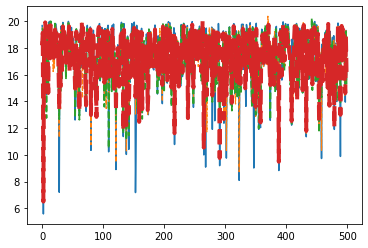

In [16]:
#train
#отрисовать факт
Y_pred = model.predict(X_train,return_hist=True)
plt.plot(Y_train)
[pred,p_array,m_pred] = Y_pred
   
for i in range(len(pred)):
    #отрисовать прогноз - несколькими цветами, яркость пропорциональна вероятности
    if 10+np.log(p_array[i])>0:
        print(p_array[i])
        plt.plot(pred[i],'--',linewidth=0.4*np.max([10+np.log(p_array[i]),0] ) )

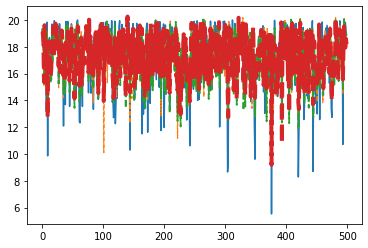

In [17]:
#test
#отрисовать факт
Y_pred = model.predict(X_test,return_hist=True)
plt.plot(Y_test)
[pred,p_array,m_pred] = Y_pred
   
for i in range(len(pred)):
    #отрисовать прогноз - несколькими цветами, яркость пропорциональна вероятности
    if 10+np.log(p_array[i])>0:
        plt.plot(pred[i],'--',linewidth=0.4*np.max([10+np.log(p_array[i]),0] ) )

In [18]:
mae = np.mean(np.abs(m_pred - Y_test))
mae_mean = mae/np.mean(np.abs(Y_test))
mae, mae_mean

(0.8137916179616639, 0.04716177502551922)